In [1]:
library(ggplot2)
library(dplyr)
library(lme4)
library(lmerTest)
library(xtable)
library(glmmTMB)
library(cowplot)
library(grid)

pallete = c("#318480", "#b4464f")


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: Matrix


Attaching package: 'lmerTest'


The following object is masked from 'package:lme4':

    lmer


The following object is masked from 'package:stats':

    step


Warning message in checkMatrixPackageVersion():
"Package version inconsistency detected.
TMB was built with Matrix version 1.2.18
Current Matrix version is 1.3.2
Please re-install 'TMB' from source using install.packages('TMB', type = 'source') or ask CRAN for a binary version of 'TMB' matching CRAN's 'Matrix' package"

********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************



# Bock 1992

In [2]:
b92_df <- read.csv("../evalsets/Bock1992/items.ptb.csv.reformat")
b92_df <- tidyr::separate(b92_df, condition, c("nums","clause"), sep="_")
b92_df <- tidyr::separate(b92_df, nums, c("subj", "attr"), sep=1:2)


b92_df$type <- as.factor(substr(b92_df$model, 8, 8))
b92_df$match <- as.factor(b92_df$subj == b92_df$attr)
b92_df$subj <- as.factor(b92_df$subj)
b92_df$clause <- as.factor(b92_df$clause)


coding_matrix <- matrix(c(1, -1), ncol=1)
contrasts(b92_df$match) <- coding_matrix
contrasts(b92_df$clause) <- coding_matrix

b92_df$sample <- 100 - b92_df$sample

b92_df$max <- 100 - b92_df$max
b92_df

means <- b92_df %>% group_by(model, type, match, clause) %>% summarize(sample = mean(sample), max = mean(max))

means_na <- b92_df %>% group_by(model, type, match, subj) %>% summarize(sample = mean(sample), max = mean(max))

means


X,item,subj,attr,clause,model,max,sample,type,match
<int>,<int>,<fct>,<chr>,<fct>,<chr>,<dbl>,<dbl>,<fct>,<fct>
0,0,s,s,prop,lstmccglm0,0,10.313835,l,TRUE
1,0,s,s,prop,lstmccglm1,0,18.466655,l,TRUE
2,0,s,s,prop,lstmccglm2,0,22.667913,l,TRUE
3,0,s,s,prop,lstmccglm3,0,16.888419,l,TRUE
4,0,s,s,prop,lstmccglm4,0,20.788809,l,TRUE
5,0,s,s,rc,lstmccglm0,0,17.531294,l,TRUE
6,0,s,s,rc,lstmccglm1,0,12.115744,l,TRUE
7,0,s,s,rc,lstmccglm2,0,13.124438,l,TRUE
8,0,s,s,rc,lstmccglm3,0,8.080907,l,TRUE


`summarise()` has grouped output by 'model', 'type', 'match'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'model', 'type', 'match'. You can override using the `.groups` argument.



model,type,match,clause,sample,max
<chr>,<fct>,<fct>,<fct>,<dbl>,<dbl>
lstmccglm0,l,FALSE,prop,61.56689,71.8750
lstmccglm0,l,FALSE,rc,65.82585,75.0000
lstmccglm0,l,TRUE,prop,24.95535,9.3750
lstmccglm0,l,TRUE,rc,23.46859,17.1875
lstmccglm1,l,FALSE,prop,63.31158,75.0000
lstmccglm1,l,FALSE,rc,64.95611,73.4375
lstmccglm1,l,TRUE,prop,20.46339,7.8125
lstmccglm1,l,TRUE,rc,17.03004,4.6875
lstmccglm2,l,FALSE,prop,61.39884,67.1875


In [3]:
output <- b92_df %>% group_by("Model Type"=type, "Subject #"=subj, "Attractor #"=attr, "Modifier Type"=clause) %>% summarize("Sample"=mean(sample), "MaxProb"=mean(max))

output
print.xtable(xtable(output), file="Bock92Table.tex", floating=FALSE)

`summarise()` has grouped output by 'Model Type', 'Subject #', 'Attractor #'. You can override using the `.groups` argument.



Model Type,Subject #,Attractor #,Modifier Type,Sample,MaxProb
<fct>,<fct>,<chr>,<fct>,<dbl>,<dbl>
l,p,p,prop,26.34620,16.250
l,p,p,rc,26.81225,16.250
l,p,s,prop,62.71820,76.875
l,p,s,rc,70.89618,86.250
l,s,p,prop,59.24866,63.125
l,s,p,rc,58.96795,60.625
l,s,s,prop,20.26241,5.000
l,s,s,rc,13.28919,3.125


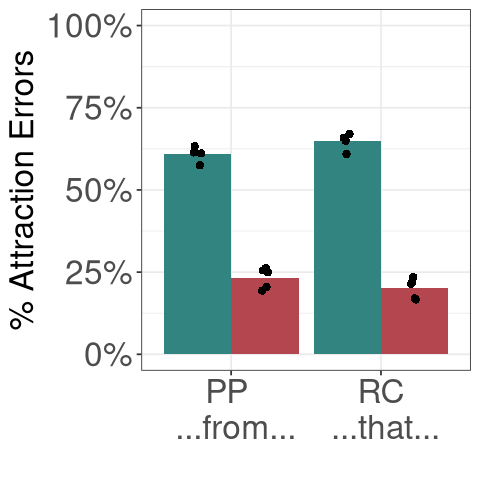

In [4]:
options(repr.plot.width=4, repr.plot.height=4)
f <- ggplot(subset(b92_df, type=="l"), aes(x=clause, fill=match, y=sample/100)) + 
geom_bar(stat="summary", position="dodge", fun=mean) + 
geom_point(data=subset(means, type=="l"), shape=16, size=2,
           position=position_jitterdodge(jitter.height=0, jitter.width = 0.1, dodge.width=0.9)) +
labs(x="", y="% Attraction Errors", fill="") +
theme_bw() +
scale_fill_manual(labels=c("Subj-Attr Mismatch \n  ...singers...", 
                        "Subj-Attr Match \n ...singer..."), values=pallete) +
scale_x_discrete(labels=c("PP \n ...from...", "RC\n ...that...")) +
scale_y_continuous(labels=scales::percent) +
coord_cartesian(ylim = c(0,1.0)) +
theme(axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20),
      strip.text=element_text(size=20), legend.text=element_text(size=20))
legend <- cowplot::get_legend(f)
f <-f + theme(legend.position = "none")
f
ggsave("Bock92_lm_ccg.png", width=4, height=4)

In [5]:
options(repr.plot.width=3, repr.plot.height=2)
grid.newpage()
png("Bock92_legend.png", width=3, height=2, units="in", res=300)
grid.draw(legend) 
dev.off()

png 
  2

In [6]:
b92_lm <- glmmTMB(data=subset(b92_df, type=="l"), 
                  sample/100 ~ subj * match * clause + (1 | item) + (1 | model),
                 family=beta_family())
summary(b92_lm)


Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"


 Family: beta  ( logit )
Formula:          sample/100 ~ subj * match * clause + (1 | item) + (1 | model)
Data: subset(b92_df, type == "l")

     AIC      BIC   logLik deviance df.resid 
  -971.4   -914.7    496.7   -993.4     1269 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 item   (Intercept) 0.01452  0.1205  
 model  (Intercept) 0.00457  0.0676  
Number of obs: 1280, groups:  item, 32; model, 5

Overdispersion parameter for beta family (): 4.74 

Conditional model:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -0.195824   0.050495  -3.878 0.000105 ***
subjs                -0.281925   0.048785  -5.779 7.52e-09 ***
match1                0.848695   0.035152  24.144  < 2e-16 ***
clause1              -0.090709   0.034213  -2.651 0.008018 ** 
subjs:match1          0.052978   0.049055   1.080 0.280159    
subjs:clause1         0.193311   0.048730   3.967 7.28e-05 ***
match1:clause1       -0.090002   0.034241  -2.628 0.008

# Haskell & Macdonald 2011

In [7]:
hm_df <- read.csv("../evalsets/HaskellMacdonald2011/items.ptb.csv.reformat")

hm_df$type <- substr(hm_df$model,8, 8)


hm_df$type <- as.factor(hm_df$type)
hm_df$condition <- as.factor(hm_df$condition)

coding_matrix <- matrix(c(1, -1), ncol=1)
contrasts(hm_df$condition) <- coding_matrix
hm_df

X,item,condition,model,max,sample,type
<int>,<int>,<fct>,<chr>,<int>,<dbl>,<fct>
0,0,SP,lstmccglm0,100,88.457435,l
1,0,SP,lstmccglm1,0,44.161751,l
2,0,SP,lstmccglm2,100,85.929921,l
3,0,SP,lstmccglm3,100,82.397059,l
4,0,SP,lstmccglm4,100,79.596681,l
5,0,PS,lstmccglm0,0,49.698404,l
6,0,PS,lstmccglm1,100,87.110879,l
7,0,PS,lstmccglm2,100,57.188615,l
8,0,PS,lstmccglm3,100,60.700498,l


In [8]:
output <- hm_df %>% group_by("Model Type"=type, "Order"=condition) %>% summarize("Sample"=mean(sample), "MaxProb" = mean(max))

output

print.xtable(xtable(output), file="HaskellTable.tex", floating=FALSE)

`summarise()` has grouped output by 'Model Type'. You can override using the `.groups` argument.



Model Type,Order,Sample,MaxProb
<fct>,<fct>,<dbl>,<dbl>
l,PS,46.77698,45
l,SP,74.70550,82


`summarise()` has grouped output by 'model', 'condition'. You can override using the `.groups` argument.



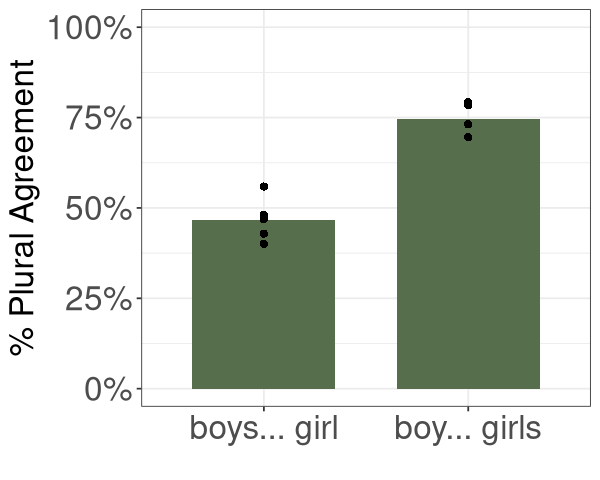

In [9]:
options(repr.plot.width=5, repr.plot.height=4)


means <- hm_df %>% group_by(model, condition, type) %>% summarize(sample = mean(sample), max = mean(max))


ggplot(subset(hm_df, type=="l"), aes(x=condition, y=sample/100)) + 
geom_bar(stat="summary", position="dodge", fun=mean, fill="#566e4b", width=0.7) + 
geom_point(data=subset(means, type=="l"), shape=16, size=2) +
labs(x="", y="% Plural Agreement") +
theme_bw() + 
scale_x_discrete(labels=c("boys... girl", "boy... girls")) + 
scale_y_continuous(labels=scales::percent) +
coord_cartesian(ylim = c(0,1)) +
theme(axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
      axis.title.y=element_text(size=20),
      strip.text=element_text(size=20), legend.text=element_text(size=20))+
theme(legend.position = "none")

ggsave("Haskell_lm_ccg.png", width= 5, height = 4)

In [10]:
hm_lm <- glmmTMB(data=subset(hm_df, hm_df$type == "l"), 
                 sample/100 ~ condition  + (1|item) + (1 | model),
                family=beta_family())

summary(hm_lm)

Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"


 Family: beta  ( logit )
Formula:          sample/100 ~ condition + (1 | item) + (1 | model)
Data: subset(hm_df, hm_df$type == "l")

     AIC      BIC   logLik deviance df.resid 
  -253.9   -233.9    131.9   -263.9      395 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 item   (Intercept) 0.37992  0.6164  
 model  (Intercept) 0.02315  0.1522  
Number of obs: 400, groups:  item, 40; model, 5

Overdispersion parameter for beta family (): 4.69 

Conditional model:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.47108    0.12708   3.707  0.00021 ***
condition1  -0.64108    0.04545 -14.106  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

# Franck 2002

In [11]:
franck_df <- read.csv('../evalsets/Franck2002/items.ptb.csv.reformat')

franck_df <- tidyr::separate(franck_df, condition, c("subj", "inter", "local"), sep=1:3)
franck_df$sample <- 100 - franck_df$sample
franck_df$max <- 100 - franck_df$max

franck_df$inter_match <- as.factor(franck_df$subj == franck_df$inter)
franck_df$local_match <- as.factor(franck_df$subj == franck_df$local)
franck_df$type = substr(franck_df$model, 8, 8)

contrasts(franck_df$local_match) <- coding_matrix
contrasts(franck_df$inter_match) <- coding_matrix

franck_lm_df = subset(franck_df, substr(franck_df$model, 8,8) == "l")
summary(franck_lm_df)


       X               item           subj              inter          
 Min.   :   0.0   Min.   : 0.00   Length:1280        Length:1280       
 1st Qu.: 319.8   1st Qu.: 7.75   Class :character   Class :character  
 Median : 639.5   Median :15.50   Mode  :character   Mode  :character  
 Mean   : 639.5   Mean   :15.50                                        
 3rd Qu.: 959.2   3rd Qu.:23.25                                        
 Max.   :1279.0   Max.   :31.00                                        
    local              model                max             sample      
 Length:1280        Length:1280        Min.   :  0.00   Min.   : 1.227  
 Class :character   Class :character   1st Qu.:  0.00   1st Qu.:19.401  
 Mode  :character   Mode  :character   Median :  0.00   Median :46.645  
                                       Mean   : 47.97   Mean   :47.674  
                                       3rd Qu.:100.00   3rd Qu.:74.739  
                                       Max.   :100.00   Ma

In [12]:
means_lm <- franck_lm_df %>% group_by(model, inter_match, local_match) %>% summarize(sample = mean(sample), max = mean(max))
means_joint <- franck_joint_df %>% group_by(model, inter_match, local_match) %>% summarize(sample = mean(sample), max = mean(max))


`summarise()` has grouped output by 'model', 'inter_match'. You can override using the `.groups` argument.



ERROR: Error in group_by(., model, inter_match, local_match): object 'franck_joint_df' not found


In [ ]:
library(repr)
options(repr.plot.width=4, repr.plot.height=4)


plt <- ggplot(franck_lm_df, aes(x=inter_match, fill=local_match, y=sample/100)) +
geom_bar(stat="summary", position="dodge", fun=mean) + 
geom_point(data=means_lm, shape=16, size=2,
           position=position_jitterdodge(jitter.height=0, jitter.width = 0.1, dodge.width=0.9)) + 
#stat_summary(fun.data = mean_se, geom = "errorbar", position="dodge", color="black") +
labs(x="Attractor 1 (President)", 
     fill="Attractor 2 (Company)", y="% Attraction Errors") +
scale_fill_manual(labels=c("Mismatch", 
                        "Match"), values=pallete) +
scale_x_discrete(labels=c("Mismatch", 
                          "Match")) + 
scale_y_continuous(labels=scales::percent) +
coord_cartesian(ylim = c(0,1.0)) +
theme_bw() +
theme(axis.text.x=element_text(size=19), axis.text.y=element_text(size=19),
      axis.title.y=element_text(size=20), axis.title.x=element_text(size=20),
      strip.text=element_text(size=20), legend.text=element_text(size=19))
legend <- cowplot::get_legend(plt)
plt <- plt + theme(legend.position = "none") 

plt

ggsave("Franck_lm_ccg.png", width = 4, height = 4)

In [ ]:
franck_lm <- glmmTMB(sample/100 ~ inter_match * local_match + (1 | item) 
                  + (1 | model), franck_lm_df, 
                   family=beta_family())
summary(franck_lm)
lm_eff <- summary(franck_lm)$coeff$cond[c("inter_matchTRUE", "local_matchTRUE"), 1]
lm_se <- summary(franck_lm)$coeff$cond[c("inter_matchTRUE", "local_matchTRUE"), 2]

lm_eff

In [ ]:
# Compare low-attr-only errors to high-attr-only errors
franck_lstm_df$cond <- factor(paste0(factor(franck_lstm_df$inter_match), factor(franck_lstm_df$local_match)))

mat = t(matrix(c(0, 1, -1, 0), ncol = 4))
mat

franck_lm <- glmmTMB(sample/100 ~ cond + (1 | item) 
                  + (1 | model), franck_lstm_df, 
                   family=beta_family(), contrasts=list(cond=mat))

summary(franck_lm)


In [ ]:
summary(franck_lm)$coeff

In [ ]:
eff_df <- data.frame(model=c("LM Only", "LM Only", "Joint CCG Training", "Joint CCG Training"), attr=c("intermediate", "local"), eff=c(lm_eff, joint_eff) , se=c(lm_se, joint_se))

eff_df
ggplot(eff_df, aes(y=-eff, x = attr, color=attr)) + 
facet_grid( ~ model) +
geom_point(stat="identity", size=5) +
geom_errorbar(aes(ymax=-eff+se, ymin=-eff-se), width=0.5) +
theme(legend.position = "none") +
labs(y=expression(beta), x="Attractor Position") 

ggsave("Franck_effectsize.png", width=2.5, height=5)